In [1]:
#pip install -e .
#import FuzzySystem as fs

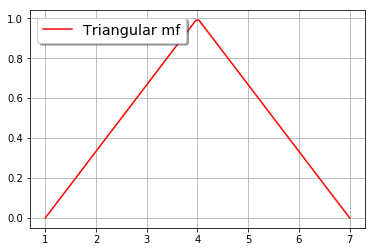

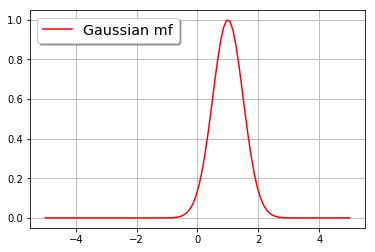

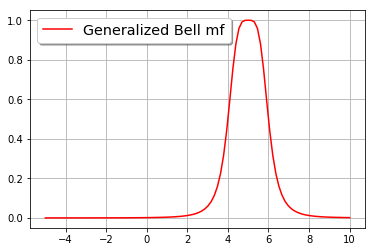

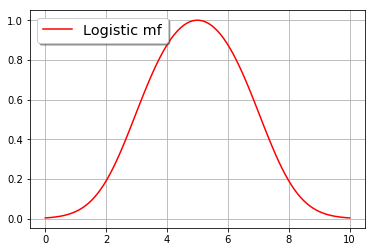

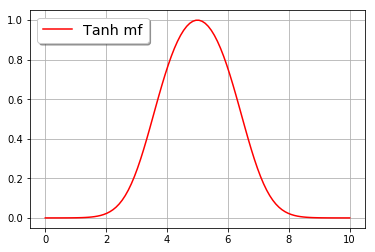

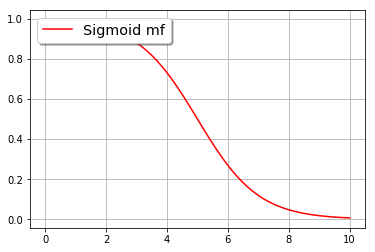

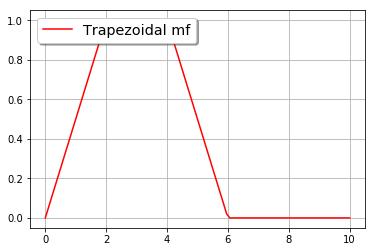

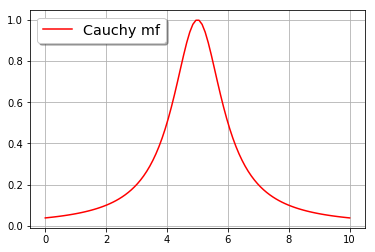

In [4]:
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

trimf = Trimf([1,4,7])
trimf.show()
gaussmf = Gaussmf([.5,1], universe=[-5,5])
gaussmf.show()
gbellmf = GBellmf([1,2,5], universe=[-5,10])
gbellmf.show()
logmf = Logmf([2,5], universe=[0,10])
logmf.show()
tanhmf = Tanhmf([2,5], universe=[0,10])
tanhmf.show()
sigmf = Sigmoidmf([-1,5], universe=[0,10])
sigmf.show()
trapmf = Trapmf([0,2,4,6], universe=[0,10])
trapmf.show()
cauchymf = Cauchymf([1,5], universe=[0,10])
cauchymf.show()

## Basic Tipping Problem

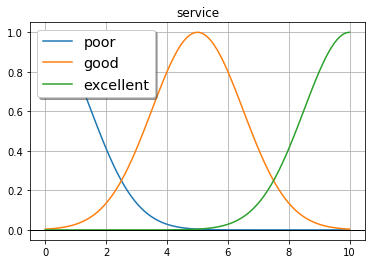

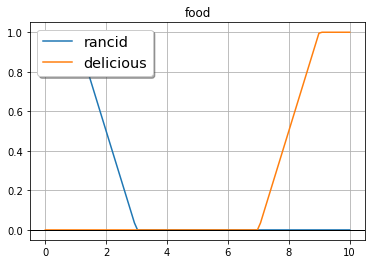

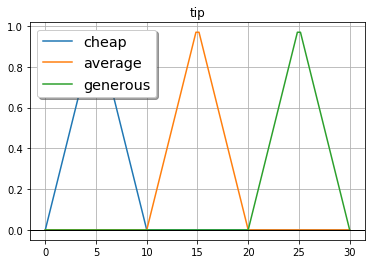


Evaluation of fis with inputs:
{'food': 8.59, 'service': 5.183}

	IF TODO THEN tip is cheap = 0.00255509922051
	IF service is good THEN tip is average = [0.9925856231157825]
	IF TODO THEN tip is generous = 0.795
Outputs: ['tip']


In [2]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

service_poor = FuzzySet('poor', Gaussmf([1.5, 0]))
service_good = FuzzySet('good', Gaussmf([1.5, 5]))
service_excellent = FuzzySet('excellent', Gaussmf([1.5, 10]))
service = FuzzyVariable('service',[service_poor, service_good, service_excellent], universe=[0, 10])
service.show()

food_rancid = FuzzySet('rancid', Trapmf([0,0,1,3]))
food_delicious = FuzzySet('delicious', Trapmf([7,9,10,10]))
food = FuzzyVariable('food', [food_rancid, food_delicious], universe=[0, 10])
food.show()

#OUTPUT

tip_cheap = FuzzySet('cheap', Trimf([0,5,10]))
tip_avg = FuzzySet('average', Trimf([10,15,20]))
tip_generous = FuzzySet('generous', Trimf([20,25,30]))
tip = FuzzyVariable('tip', [tip_cheap, tip_avg, tip_generous], universe=[0, 30])
tip.show()

#RULES

ant1  = Antecedent(service['poor'] | food['rancid'])
cont1 = Consequent([tip['cheap']])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(service['good'])
cont2 = Consequent([tip['average']])
rule2 = FuzzyRule(ant2, cont2)

ant3  = Antecedent(service['excellent'] | food['delicious'])
cont3 = Consequent([tip['generous']])
rule3 = FuzzyRule(ant3, cont3)

#Building the FIS

fis = FuzzyInferenceSystem([rule1, rule2, rule3])

#FIS Evaluation

inputs = {'service':5.183, 'food':8.59}
result = fis.eval(inputs)
print(result)

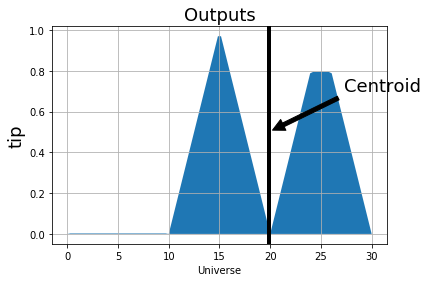

{'tip': 19.856360269643556}

In [3]:
result.show(Centroid)
Centroid(result).eval()